Practicing machine learning problems by translating the exercises done in Andrew Ng's Machine Leaning Course on Coursera from Octave into Python. This notebook covers linear regression with one variable and with multiple variables. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data file for linear regression with one variable

my_file = '/Users/newowner/Desktop/DataScienceNotes/machine-learning-ex1/ex1/ex1data1.txt'
my_data = np.loadtxt(my_file, delimiter=',')

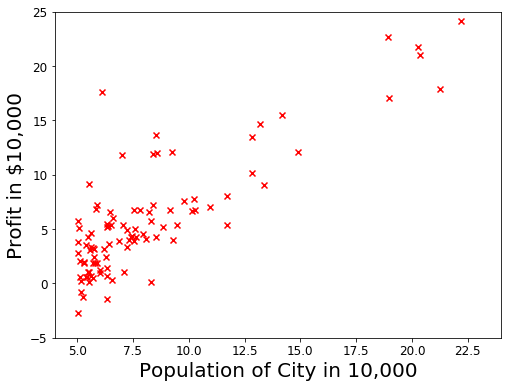

In [3]:
# first visualize the data

figure = plt.figure(figsize=(8,6))
plt.scatter(my_data[:,0], my_data[:,1], marker = 'x', color='r')
plt.xlabel("Population of City in 10,000", fontsize=20)
plt.ylabel("Profit in $10,000", fontsize = 20)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(4, 24)
plt.ylim(-5, 25)
plt.show()

The goal of gradient descent is to find the $\theta$ parameters that minimize the cost function:

\begin{equation}
    J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2
\end{equation}

Here we are using the linear hypothesis, $h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1x_1$. To find the right $\theta$ we will apply batch gradient descent in which we perform the follwing update with each iteration: 

\begin{equation}
    \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}
\end{equation}

In [4]:
x = my_data[:,0]
y = my_data[:,1]

# now add a column of ones to X matrix for intercept term 
x = np.c_[np.ones(len(x)), x]
y = np.reshape(y,(len(y), 1))

In [5]:
def computeCost(x, y, theta):
    m = len(y)
    return (1/(2.0*m))*np.sum(np.square(np.matmul(x, theta)-y))

In [6]:
# test cost function with two different inital theta values

theta = [[0], [0]]
print('With theta = {} the cost function is: {}.\n Expected value is approx. 32.07.'.format(theta, computeCost(x, y, theta)))

theta = [[-1], [2]]
print('With theta = {} the cost function is: {}.\n Expected value is approx. 54.24.'.format(theta, computeCost(x, y, theta)))

With theta = [[0], [0]] the cost function is: 32.0727338775.
 Expected value is approx. 32.07.
With theta = [[-1], [2]] the cost function is: 54.242455082.
 Expected value is approx. 54.24.


In [19]:
def gradDescent(x, y, theta, alpha, iters):
    m = len(y)
    J_history = np.zeros((iters, 1))
    theta = np.zeros(x.shape[1])
    
    for i in range(iters):
        #diff = np.dot(x, theta)- y
        #prod = np.dot(np.transpose(x), diff)
        prod = np.matmul(x.T, np.matmul(x, theta)-y)
        theta = theta - (alpha/m)*prod
        
        J_history[i] = computeCost(x, y, theta)
        
    return theta, J_history 

In [8]:
theta, J_history = gradDescent(x, y, theta, 0.01, 1500)

print("Optimum values for theta are: \n theta0: {}, theta1: {}".format(theta[0], theta[1]))

Optimum values for theta are: 
 theta0: [-3.70968912], theta1: [ 1.17433871]


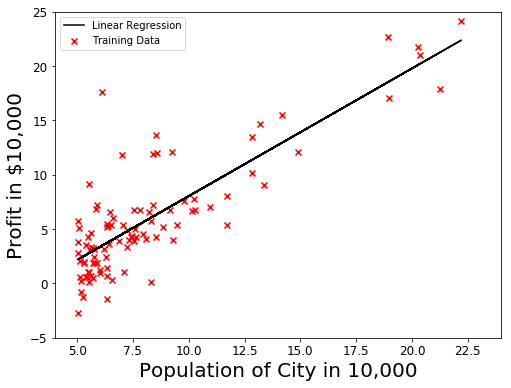

In [9]:
# now plot hypothesis on data
fig = plt.figure(figsize=((8,6)))

plt.scatter(my_data[:,0], y, marker = 'x', color='r', label = 'Training Data')
plt.plot(my_data[:,0], np.dot(x, theta), color='k', label = "Linear Regression")
plt.xlabel("Population of City in 10,000", fontsize=20)
plt.ylabel("Profit in $10,000", fontsize = 20)
plt.xlim(4, 24)
plt.ylim(-5, 25)
plt.tick_params(axis='both', labelsize=12)
plt.legend()
plt.show()

In [10]:
# make predictions of profit based on hypothesis function

x1 = np.array([1, 3.5])
predict1 = np.dot(x1, theta)*10000

x2 = np.array([1, 7])
predict2 = np.dot(x2, theta)*10000

print('For a population of {} we predict a profit of {}\n'.format('35,000', predict1))
print('For a population of {} we predict a profit of {}\n'.format('70,000', predict2))

For a population of 35,000 we predict a profit of [ 4004.9636045]

For a population of 70,000 we predict a profit of [ 45106.81840164]



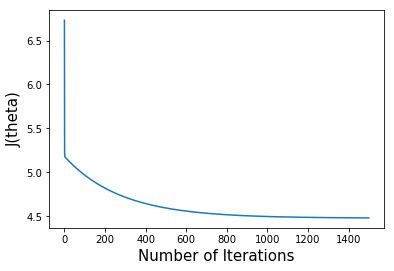

In [11]:
# We can verify that gradient descent is working by plotting J at each iteration
# we should see J decrease with each iteration

plt.plot(np.arange(0,1500), J_history)
plt.xlabel("Number of Iterations", fontsize = 15)
plt.ylabel("J(theta)", fontsize = 15)
plt.show()

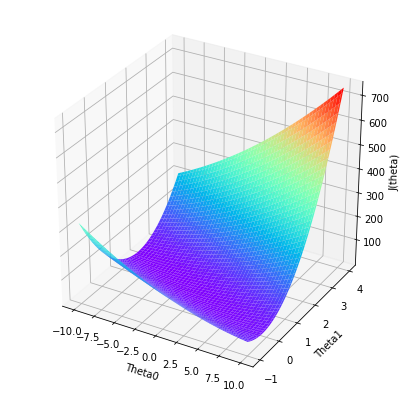

In [12]:
# now create surface plot of J values for different theta choices to help visualize the minimum 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create grid of theta0 and theta1 values 
Xs, Ys = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-1, 4, 100))

# loop through all possible combinations of theta values and compute the cost for each 
J_vals = np.array([computeCost(x, y, [[t0], [t1]]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
# reshape cost array to match the shape of the meshgrid 
J_vals = np.reshape(J_vals, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.plot_surface(Xs, Ys, J_vals, cmap=cm.rainbow)
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('J(theta)')
plt.show()

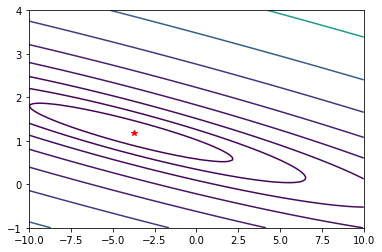

In [13]:
# contour plot of J as a function of Theta0, Theta1
# indicate optimum theta values found by gradient descent with star
# shows that gradient descent finds the correct values of theta

ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, J_vals, np.logspace(-2, 3, 20))
plt.show()

Now we will perform linear regression on a data set with multiple variables

In [14]:
multi_file = my_file = '/Users/newowner/Desktop/DataScienceNotes/machine-learning-ex1/ex1/ex1data2.txt'
multi_data = np.loadtxt(multi_file, delimiter=',')

X = multi_data[:,:2]
y = multi_data[:,2]

In [15]:
print('Loading first 10 examples from dataset:\n')
for i in range(10):
    print('x = {}, y = {}'.format(X[i], y[i]))

Loading first 10 examples from dataset:

x = [ 2104.     3.], y = 399900.0
x = [ 1600.     3.], y = 329900.0
x = [ 2400.     3.], y = 369000.0
x = [ 1416.     2.], y = 232000.0
x = [ 3000.     4.], y = 539900.0
x = [ 1985.     4.], y = 299900.0
x = [ 1534.     3.], y = 314900.0
x = [ 1427.     3.], y = 198999.0
x = [ 1380.     3.], y = 212000.0
x = [ 1494.     3.], y = 242500.0


When our features differ by orders of magnitude gradient descent can take longer to converge. We can fix this by scaling our features such that they all take on similar values. The way we do this is by taking each feature and performing:

\begin{equation}
    x^{(i)}_j = \frac{x^{(i)}_j - \mu_j}{\sigma_j}
\end{equation}

Where $\mu_j$ is the mean of feature $j$ and $\sigma_j$ is the standard deviation of feature $j$. 

In [16]:
def featureNormalize(x):
    mu = np.mean(x,0)
    std = np.std(x, axis=0, ddof=1)
    X_norm = (x-mu)/std
    return X_norm, mu, std

In [17]:
X, mu, sigma = featureNormalize(X)
X = np.column_stack((np.ones(len(X)), X))

Our functions for computing the cost function and batch gradient descent work both for a single variable and for multiple variables. 

In [20]:
theta, J_hist= gradDescent(X, y, np.zeros((3, 1)), 0.03, 400)

print("Theta computed from gradient descent: {}".format(theta))

Theta computed from gradient descent: [ 340410.91897274  110308.11337059   -6326.5381075 ]


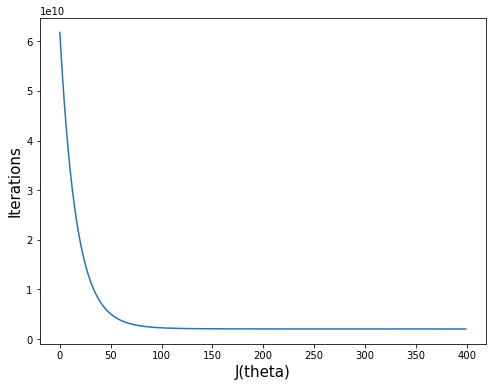

In [21]:
# confirm that J decreases with each iteration
figure = plt.figure(figsize=(8, 6))

plt.plot(np.arange(0,400), J_hist)
plt.xlabel('J(theta)', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()

In [22]:
# predict price of home

footage_norm = (1650 - mu[0])/sigma[0]
room_norm = (3-mu[1])/sigma[1]
price = theta[0] + theta[1]*footage_norm + theta[2]*room_norm

print('Predicted price of home for 1650 sq-ft and 3 bedroom is {}.'.format(price))

Predicted price of home for 1650 sq-ft and 3 bedroom is 293149.994329.


We can also find the optimum $\theta$ by using the normal equation. This is done by performing:

\begin{equation}
    \theta = (X^TX)^{-1} X^Ty
\end{equation}

This method also has the added benefit that feature scaling does not need to be performed. 

In [23]:
# now solve using the normal equation 

X = multi_data[:,:2]
y = multi_data[:,2]
X = np.column_stack((np.ones(len(X)), X))

In [24]:
def normalEqn(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [25]:
theta = normalEqn(X,y)

print('Theta found using normal equations: {}'.format(theta))

Theta found using normal equations: [ 89597.9095428     139.21067402  -8738.01911233]


In [26]:
# now make prediction for price of home

price = theta[0] + theta[1]*1650 + theta[2]*3
print('Price of 1650 sq-ft home with 3 bedrooms: {}.'.format(price))

Price of 1650 sq-ft home with 3 bedrooms: 293081.464335.


The predictions made using gradient descent and the normal equation produce similar results as expected. 